## XGBoost Classifier

In [16]:
import pandas as pd
df=pd.read_csv("datasets/Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [17]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

In [18]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, 0:5]
y = df.iloc[:, 5]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)

In [19]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### XGBoost

In [20]:
import xgboost
print(xgboost.__version__)

1.6.2


In [21]:
from xgboost import XGBClassifier

In [22]:
(XGBClassifier)

xgboost.sklearn.XGBClassifier

In [23]:
xgbt = XGBClassifier(max_depth = 2,
             learning_rate = 0.2,
             objective  = "multi:softmax",
             num_class = 2,
             booster = "gbtree",
             n_estimarors = 10,
             random_state = 123)

In [24]:
model=xgbt.fit(X_train, y_train)
model

[19:02:08] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimarors" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimarors=10,
              n_estimators=100, n_jobs=0, num_class=2, num_parallel_tree=1,
              objective='multi:softmax', predictor='auto', ...)

In [25]:
xgbt_pred = xgbt.predict(X_test)



In [26]:
from sklearn.metrics import accuracy_score

In [27]:
accuracy_score(y_test, xgbt_pred)

1.0

In [28]:
xgbt.score(X_train, y_train)

1.0

In [29]:
xgbt.score(X_test, y_test)

1.0

In [30]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

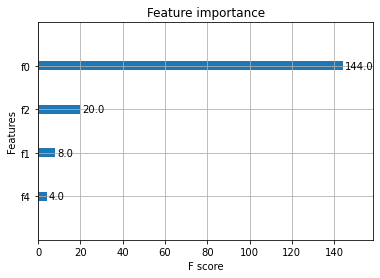

In [31]:
plot_importance(xgbt)

#diabeties 

In [1]:
import pandas as pd
df=pd.read_csv("diabetes_lab.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [10]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Outcome'] = le.fit_transform(df['Outcome'])



from sklearn.model_selection import train_test_split

X = df.iloc[:, 0:8]
y = df.iloc[:, 8]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)


scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [15]:
!pip install xgboost

import xgboost
print(xgboost.__version__)

Defaulting to user installation because normal site-packages is not writeable
1.6.2


In [33]:
from xgboost import XGBClassifier

In [34]:
(XGBClassifier)

xgboost.sklearn.XGBClassifier

In [35]:
xgbt = XGBClassifier(max_depth = 2,
             learning_rate = 0.2,
             objective  = "multi:softmax",
             num_class = 2,
             booster = "gbtree",
             n_estimarors = 10,
             random_state = 123)

In [36]:
model=xgbt.fit(X_train, y_train)
model

[19:04:11] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimarors" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimarors=10,
              n_estimators=100, n_jobs=0, num_class=2, num_parallel_tree=1,
              objective='multi:softmax', predictor='auto', ...)

In [41]:
xgbt_pred = xgbt.predict(X_test)

accuracy_score(y_test, xgbt_pred)






1.0

In [40]:
xgbt.score(X_train, y_train)

1.0

In [39]:
xgbt.score(X_test, y_test)

1.0

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

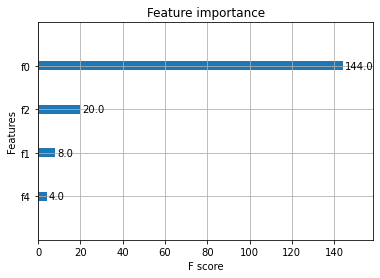

In [38]:

from xgboost import plot_importance
import matplotlib.pyplot as plt

plot_importance(xgbt)